
<img src="Tp1.png">


 
                                                                                           Réalisé par chiraz GUESMI 
<h1><center> TP2 : Segmentation d'image en python </center></h1>

<img src="barbie.jpg">


<h3><span style='color:blue'>Introduction</span></h3>
<p style="font-family: times, serif; font-size:13pt; font-style:italic">
Quelle est la première chose que la poupée de la serie <strong>SQUID GAME</strong> 
  fait lorsque elle tente d'eliminer un joueur  ? elle regarde généralement à gauche et à droite, elle fait le point sur les
les personnes  sur la piste , et elle prend  sa décision. Notre cerveau est capable d'analyser, en quelques millisecondes,
    quel est le sexe de joueur  (femme ,homme) qui a perdu l'equilibre .Mais réllement la poupée est un robot .Alors comment elle fonctionne ?
les progrès de la vision par ordinateur ont changé la donne. Nous sommes en mesure de construire des modèles de vision par ordinateur qui peuvent détecter des objets, déterminer leur forme, prédire la direction qu'ils vont prendre, et bien d'autres choses encore. 
</p>


<p style="font-family: times, serif; font-size:13pt; font-style:italic">
Dans ce <strong> TP</strong> , Nous allons presenter  le concept de segmentation d'image. Il s'agit d'un puissant algorithme de vision par ordinateur qui s'appuie sur l'idée de la détection d'objets et qui nous permet d'atteindre un tout autre niveau de travail avec les images.
<p>

<h3> <strong><span style="font-family: times, serif;color:blue; font-size:18pt; font-style:italic">Objectifs </span></strong></h3>

<p style="font-family: times, serif; font-size:13pt; font-style:italic">
<br>
* Fournir des régions homogènes (selon un critère donné).
<br>
* Localiser de manière précise les contours des régions.
<br>
* L’étude et l’interprétation des structures anatomiques.
<br>
* Réduction de bruit. [5]
</p>

<h3><span style="font-family: times, serif;color:blue; font-size:18pt; font-style:italic">Partie 1 : Segmentation avec l'Algorithme K-MEANS </span></h3>
<h4><mark style="background-color: GreenYellow">K-means</mark> </h4>
<p style="font-family: times, serif; font-size:13pt; font-style:italic">
La méthode des kmeans permet de regrouper les objets (ou sujets, ou sites, ou point, etc…) en K clusters distincts. Ce nombre K doit être spécifié, mais il existe des approches pour déterminer son nombre optimal.
La méthode des kmeans repose sur la minimisation de la somme des distances euclidiennes au carré entre chaque objet (ou sujet, ou point) et le centroïde (le point central) de son cluster.
</p>


<h4><mark style="background-color: GreenYellow"> Algorithme </mark></h4>
<p style="font-family: times, serif; font-size:13pt; font-style:italic">
L’algorithme du kmeans est un algorithme itératif qui minimise la somme des distances entre chaque individu et le centroïde du cluster ; c’est la variabilité intra cluster.
Le principe est :
 <br> 1) Attribuer un cluster à chaque objet (ou sujet, ou point), de façon aléatoire.)
<br>2) Calculer le centroïde de chaque cluster (c’est-à-dire le vecteur des moyennes des différentes variables)
<br>3) Pour chaque objet (ou sujet ou point) calculer sa distance euclidienne avec les centroides de chacun des clusters
 <br>4) Attribuer à l’objet le cluster le plus proche de lui
<br>6) Calculer la somme de la variabilité intra-cluster
<br>7) Recommencer les étapes 2 à 5, jusqu’à atteindre un équilibre, on parle de convergence : plus aucun changement de clusters, ou stabilisation de la somme de la variabilité intra-cluster.
 </p>


<h4><mark style="background-color: GreenYellow"> Code python </mark></h4>

In [7]:
!pip install opencv-python

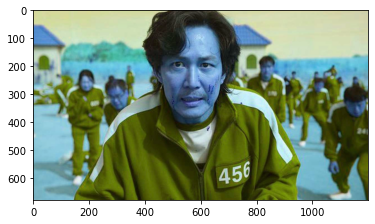

In [8]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np 
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
# lire l'image 
image = cv2.imread('squidgame.jpg')
(h1, w1) = image.shape[:2]
# avant tout on doit convertir l'image en RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
# On va utiliser la fonction  CV2.kmeans () qu'elle utilise comme entrée une image de 2D or ce n'est pas le cas pour notre image
#3D (largeur, longeur, profondeurde 3 RGB),d'ou on doit la convertir en 2D seulemnet 
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt = KMeans(n_clusters = 3)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('squidgame2.jpg', quant)
plt.imshow(image)

cv2.imread('squidgame.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

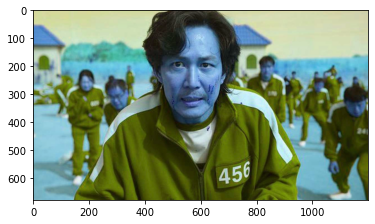

In [9]:
plt.imshow(image)


<h3><span style="font-family: times, serif;color:blue; font-size:18pt; font-style:italic">Partie 2 :  Traitée une image bruitée  </span></h3>
<h4><mark style="background-color: GreenYellow">Création d’une image bruitée  </mark></h4>
<p style="font-family: times, serif; font-size:13pt; font-style:italic">
Le but de cette partie est de faire le filtrage linaire et non lineaire pour une image bruitée par le bruit (gaussion , localvar, poisson , salt ,pepper, s&p,speckle)
</p>

<h4><mark style="background-color: GreenYellow">Code python  </mark></h4>


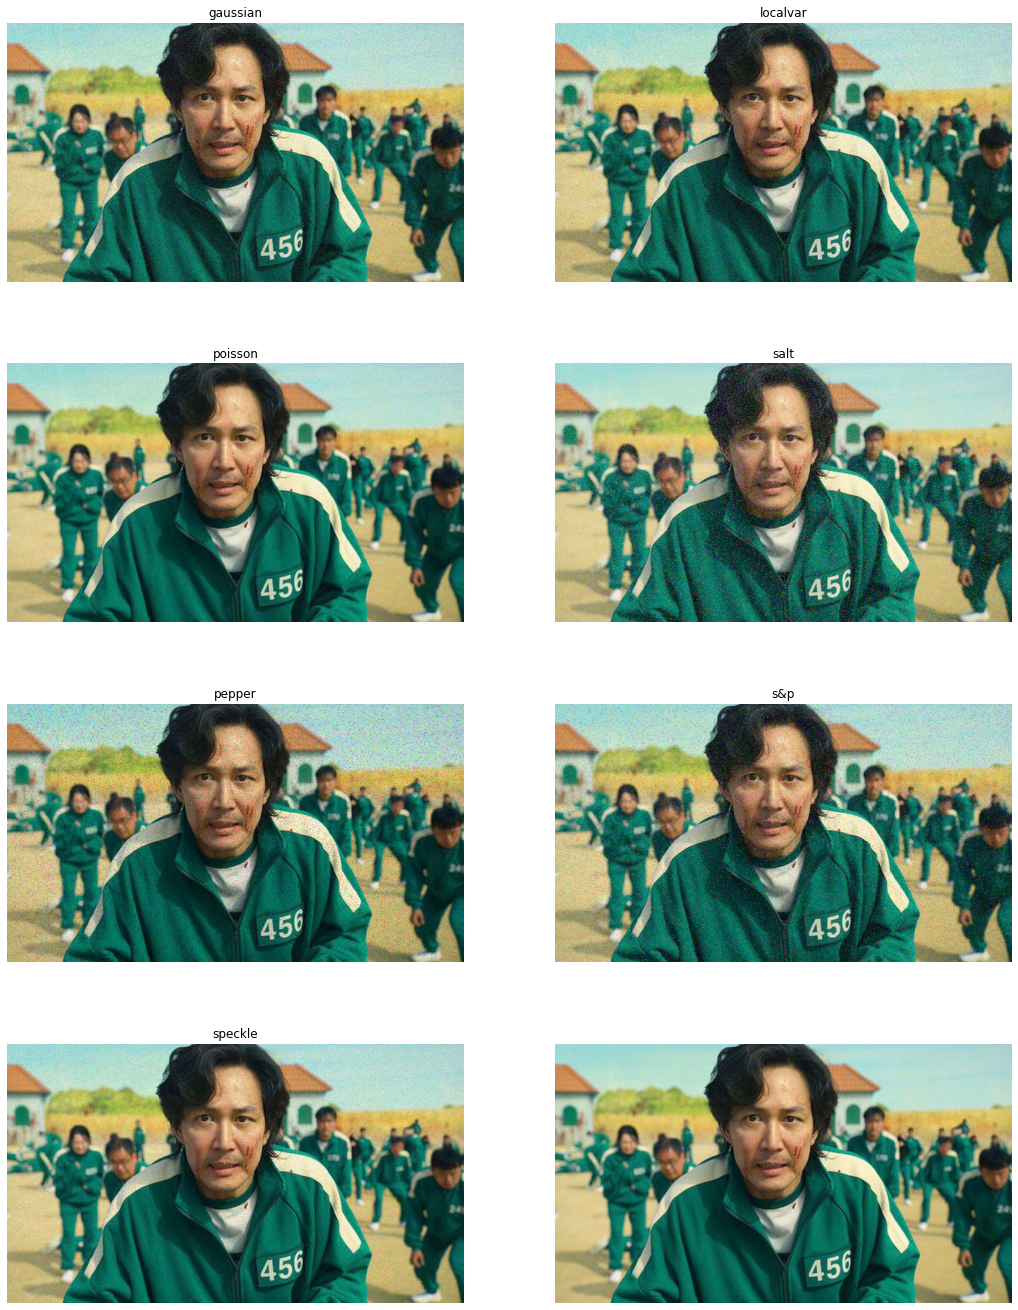

In [10]:
import skimage.io
import matplotlib.pyplot as plt
img_path="squidgame.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


<h4><mark style="background-color: GreenYellow">Elimination de bruit par le filtrage  </mark></h4>

Il y'a plusieurs fonction d'élimination de bruit avec skimage pour restaurer les images bruitées citons :

<mark style="background-color: Yellow">skimage.restoration.denoise_bilateral(image)</mark> Denoise image using bilateral filter.

<mark style="background-color: Yellow">skimage.restoration.denoise_nl_means(image) </mark> Perform non-local means denoising on 2-D or 3-D grayscale images, and 2-D RGB images.

<mark style="background-color: Yellow">skimage.restoration.denoise_tv_chambolle(image) </mark> Perform total-variation denoising on n-dimensional images.

<mark style="background-color: Yellow">skimage.restoration.denoise_wavelet(image[, …]) </mark> Perform wavelet denoising on an image.


<h4><mark style="background-color: GreenYellow"> Code python Bilateral Filter </mark></h4>

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2386f22cca0>)

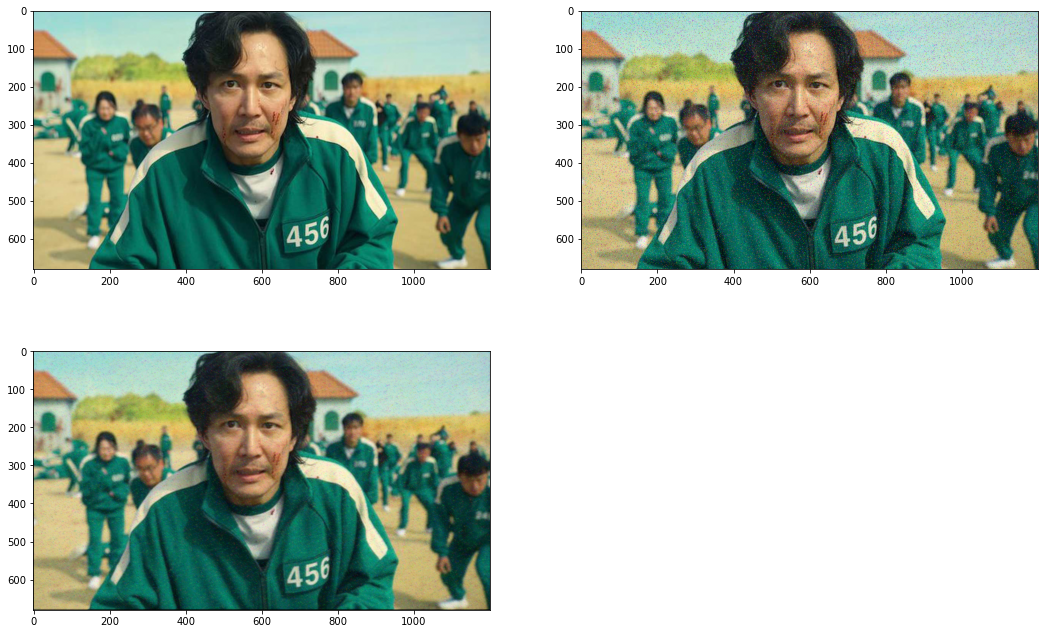

In [11]:
from skimage.restoration import denoise_bilateral
import skimage.io
import matplotlib.pyplot as plt
img_path="squidgame.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)

# Add noise to the image
spImg = skimage.util.random_noise(img, mode="s&p")
plt.subplot(4, 2, 2),plt.imshow(spImg)

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(spImg, multichannel=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)


<h4><mark style="background-color: GreenYellow">Perform wavelet denoising</mark></h4>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2386ea76e20>)

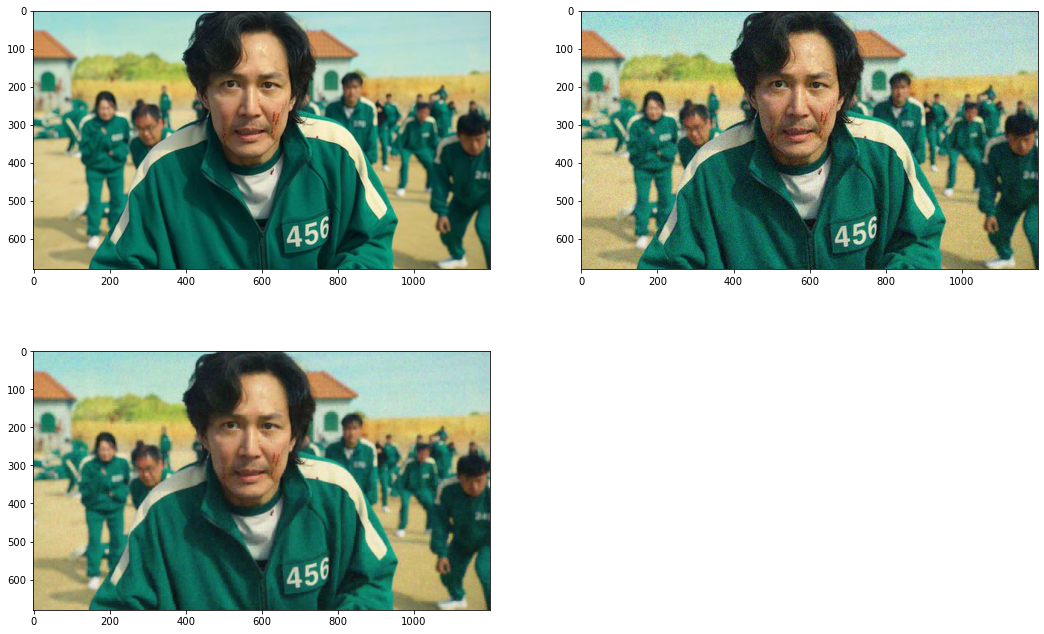

In [12]:
from skimage.restoration import denoise_wavelet
import skimage.io
import matplotlib.pyplot as plt
img_path="squidgame.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)
# Add noise to the image
gaussimg = skimage.util.random_noise(img, mode="gaussian")
plt.subplot(4, 2, 2),plt.imshow(gaussimg)
# Apply denoise_wavelet filter denoising
denoised_image = denoise_wavelet(gaussimg, sigma=0.1, multichannel=True, rescale_sigma=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)


<h4><mark style="background-color: GreenYellow">Perform total-variation denoising</mark></h4>

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2386ea2d3d0>)

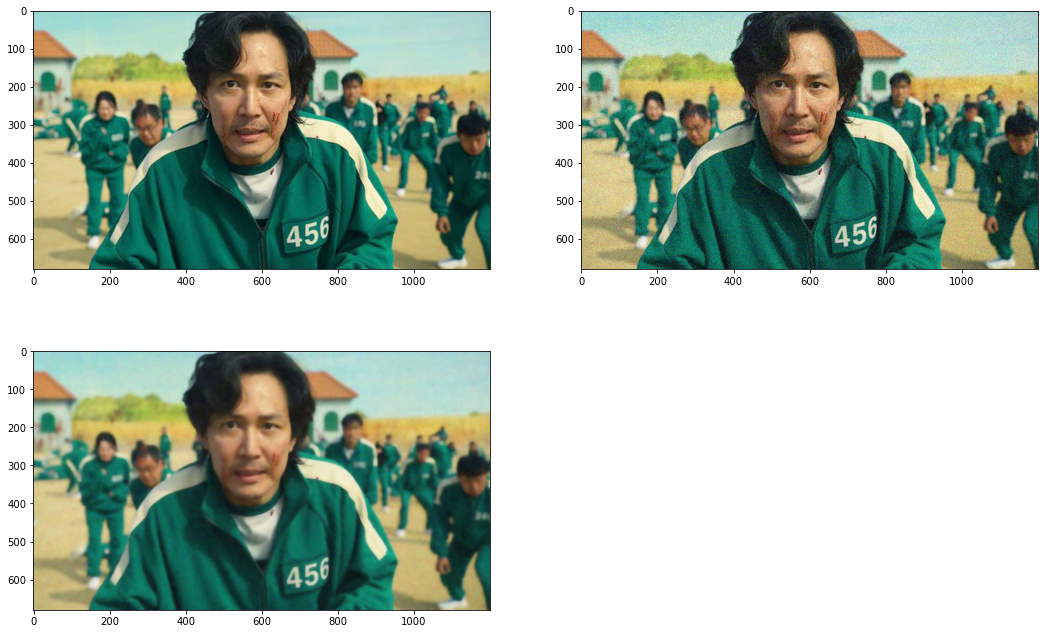

In [13]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
img_path="squidgame.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)
# Add noise to the image
limg = skimage.util.random_noise(img, mode="localvar")
plt.subplot(4, 2, 2),plt.imshow(limg)
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(limg ,weight=0.3,multichannel=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)